- [ ] 

In [1]:
#import libraries

import geopandas as gpd
import pandas as pd
import numpy as np
import folium
import json
from shapely.geometry import Polygon
import os
from bokeh.resources import CDN
from bokeh.embed import file_html
import mplleaflet
import matplotlib.pyplot as plt
import plotly as pl
import plotly.express as px


/shared-libs/python3.10/py/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


## Read and visualize predictor datasets

### Mulier gemeente

In [2]:
# Mulier gemeente

# Define path to folder
filepath = r"/work/Data/Predictors/sport_movement_areas_index/mulier_20210901_kbo_gemeente.shp"

# Print out the full file path
print(filepath)

# Read file using gpd.read_file()
mulier = gpd.read_file(filepath)

/work/Data/Predictors/sport_movement_areas_index/mulier_20210901_kbo_gemeente.shp


In [3]:
type(mulier)
mulier.head()

,id,gemeenteco,gemeentena,groenblauw,accommodat,speelplekk,voorzienin,kernindica,totaal,geometry
0,1,GM0518,'s-Gravenhage,51.0,77.42,21.0,81.0,58.0,58.0,"MULTIPOLYGON (((73038.250 452859.401, 73029.58..."
1,2,GM0796,'s-Hertogenbosch,73.0,58.09,-9997.0,48.0,0.0,60.0,"POLYGON ((158563.020 419595.208, 158586.535 41..."
2,3,GM1680,Aa en Hunze,71.0,45.31,-9997.0,7.0,0.0,41.0,"POLYGON ((248579.512 567922.543, 248630.962 56..."
3,4,GM0358,Aalsmeer,59.0,48.19,-9997.0,44.0,0.0,50.0,"POLYGON ((116307.661 478635.954, 116369.516 47..."
4,5,GM0197,Aalten,51.0,58.99,5.0,41.0,39.0,39.0,"POLYGON ((236230.546 443306.852, 236251.256 44..."


In [4]:

len(mulier)

355

<AxesSubplot: >

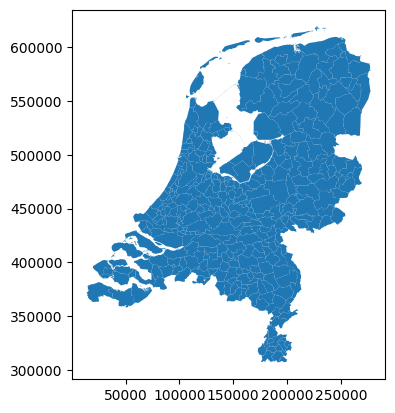

In [5]:
mulier.plot()

In [6]:
mulier.columns

Index(['id', 'gemeenteco', 'gemeentena', 'groenblauw', 'accommodat',
       'speelplekk', 'voorzienin', 'kernindica', 'totaal', 'geometry'],
      dtype='object')

In [7]:
# This won't load in Deepnote (memory size problem), run it locally perhaps in VS Code or Jupyter Notebook
#mulier.explore(column='totaal')

KeyboardInterrupt: 

Here we have to decide which variables we want to use. --> Clean up and remove unnecessary columns 

### Gezondheidsmonitor data

### Prox Facs

## Combine predictors and dependent variable

In [8]:
#NL: Gezondheidsmonitor; regio, 2020
#EN: Health monitor; region, 2020
#https://opendata.cbs.nl/statline/portal.html?_la=nl&_catalog=CBS&tableId=85012NED&_theme=286

gez_monitor = pd.read_csv("/work/Data/Predictors/gezondheidsmonitor.csv", delimiter=';')
gez_monitor

,ID,Leeftijd,Marges,RegioS,ErvarenGezondheidGoedZeerGoed_1,EenOfMeerLichamelijkeBeperkingen_3,BeperkingInBewegen_6,Ondergewicht_7,NormaalGewicht_8,Overgewicht_9,MatigOvergewicht_10,ErnstigOvergewichtObesitas_11,VoldoetAanBeweegrichtlijn_12,WekelijksSporter_13,Rokers_17,OvermatigDrinker_20
0,17,10000,MW00000,GM1680,83.1,13.8,8.2,0.7,50.1,49.2,34.3,14.9,47.3,48.3,14.3,5.4
1,18,10000,MW00000,GM0358,82.7,10.2,5.8,1.2,50.3,48.5,36.4,12.1,48.1,58.8,13.0,5.0
2,19,10000,MW00000,GM0197,79.1,15.1,8.3,1.4,49.2,49.4,33.8,15.6,56.2,51.5,14.7,6.6
3,20,10000,MW00000,GM0059,79.1,16.0,11.4,0.8,42.6,56.6,40.0,16.6,48.7,40.7,19.8,7.9
4,21,10000,MW00000,GM0482,77.0,17.1,11.5,2.0,41.7,56.3,38.8,17.5,42.9,40.0,14.9,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,3551,80200,MBG0095,GM0879,65.7,35.4,26.6,3.2,44.4,64.4,47.9,21.1,43.8,33.1,9.8,10.2
3191,3552,80200,MBG0095,GM0301,78.8,26.0,20.7,2.3,47.4,60.3,44.6,19.4,46.0,40.9,12.2,8.0
3192,3553,80200,MBG0095,GM1896,72.0,32.0,24.2,1.8,37.0,70.7,50.7,24.1,38.7,27.8,11.8,7.4
3193,3554,80200,MBG0095,GM0642,71.4,30.0,24.9,2.4,40.1,67.0,49.3,21.6,35.1,34.0,11.5,9.5


In [9]:
#Every municipality has 9 entries because it was a study of like every 4 years since 1980/1985-2020?
gez_monitor['RegioS'].value_counts()

GM0262    9
GM0263    9
GM0340    9
GM0772    9
GM1955    9
         ..
GM0779    9
GM1774    9
GM0164    9
GM1699    9
GM1894    9
Name: RegioS, Length: 355, dtype: int64

In [10]:
#Checking which one of the entries of Amsterdam should be kept.
#This report of 2020 shows that 79% experience good health, which corresponds to the first row with the lowest ID https://www.ggdgezondheidinbeeld.nl/wp-content/uploads/2021/09/Amsterdamse-gezondheidsmonitor-2020.pdf
gez_monitor[(gez_monitor['RegioS']=='GM0363')]

,ID,Leeftijd,Marges,RegioS,ErvarenGezondheidGoedZeerGoed_1,EenOfMeerLichamelijkeBeperkingen_3,BeperkingInBewegen_6,Ondergewicht_7,NormaalGewicht_8,Overgewicht_9,MatigOvergewicht_10,ErnstigOvergewichtObesitas_11,VoldoetAanBeweegrichtlijn_12,WekelijksSporter_13,Rokers_17,OvermatigDrinker_20
15,32,10000,MW00000,GM0363,79.3,14.9,9.4,2.7,58.1,39.3,28.1,11.2,56.9,58.6,21.8,7.1
370,430,10000,MOG0095,GM0363,78.3,14.0,8.7,2.3,56.9,38.2,27.0,10.5,55.7,57.4,20.8,6.6
725,828,10000,MBG0095,GM0363,80.2,15.7,10.1,3.1,59.2,40.4,29.2,12.0,58.0,59.8,22.9,7.8
1080,1226,53115,MW00000,GM0363,82.5,12.1,6.8,2.8,60.3,36.9,26.8,10.1,60.7,62.6,23.2,6.7
1435,1624,53115,MOG0095,GM0363,81.4,11.1,6.1,2.4,59.0,35.6,25.6,9.3,59.3,61.2,22.1,6.0
1790,2022,53115,MBG0095,GM0363,83.6,13.1,7.6,3.3,61.7,38.2,28.0,11.0,62.1,64.0,24.4,7.4
2145,2420,80200,MW00000,GM0363,61.2,29.5,23.0,1.8,45.0,53.2,35.6,17.6,35.7,36.5,14.1,9.9
2500,2818,80200,MOG0095,GM0363,59.7,28.1,21.7,1.4,43.4,51.5,34.0,16.3,34.2,34.9,12.9,9.0
2855,3216,80200,MBG0095,GM0363,62.8,31.0,24.5,2.3,46.7,54.8,37.2,18.9,37.3,38.1,15.2,10.9


In [11]:
#Deciding to keep al first instances of all municipalities

health = gez_monitor.drop_duplicates(subset='RegioS', keep='first')
health

#Only 355 rows now

,ID,Leeftijd,Marges,RegioS,ErvarenGezondheidGoedZeerGoed_1,EenOfMeerLichamelijkeBeperkingen_3,BeperkingInBewegen_6,Ondergewicht_7,NormaalGewicht_8,Overgewicht_9,MatigOvergewicht_10,ErnstigOvergewichtObesitas_11,VoldoetAanBeweegrichtlijn_12,WekelijksSporter_13,Rokers_17,OvermatigDrinker_20
0,17,10000,MW00000,GM1680,83.1,13.8,8.2,0.7,50.1,49.2,34.3,14.9,47.3,48.3,14.3,5.4
1,18,10000,MW00000,GM0358,82.7,10.2,5.8,1.2,50.3,48.5,36.4,12.1,48.1,58.8,13.0,5.0
2,19,10000,MW00000,GM0197,79.1,15.1,8.3,1.4,49.2,49.4,33.8,15.6,56.2,51.5,14.7,6.6
3,20,10000,MW00000,GM0059,79.1,16.0,11.4,0.8,42.6,56.6,40.0,16.6,48.7,40.7,19.8,7.9
4,21,10000,MW00000,GM0482,77.0,17.1,11.5,2.0,41.7,56.3,38.8,17.5,42.9,40.0,14.9,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,367,10000,MW00000,GM0879,78.6,13.9,8.1,0.8,44.4,54.8,38.4,16.4,48.4,47.4,12.2,8.5
351,368,10000,MW00000,GM0301,79.6,14.0,9.0,1.7,50.6,47.7,32.6,15.1,54.0,49.2,16.8,5.0
352,369,10000,MW00000,GM1896,83.0,12.2,7.8,1.9,42.5,55.6,35.2,20.5,46.4,41.1,18.2,7.6
353,370,10000,MW00000,GM0642,75.2,15.0,10.2,2.1,41.2,56.7,37.3,19.3,40.6,41.9,14.9,5.6


In [12]:
#NL: Nabijheid voorzieningen; regio
#EN: Proximity of facilities; region 
#https://opendata.cbs.nl/statline/portal.html?_la=nl&_catalog=CBS&tableId=80305ned&_theme=413

prox_facs = pd.read_csv("/work/Data/Predictors/prox_facs.csv", delimiter=';')
prox_facs

#A lot of nans, by checking why it seems that these municipalities merged with bigger ones so there is no data from 2020 of them

,ID,RegioS,Perioden,AfstandTotHuisartsenpraktijk_1,Binnen5Km_4,AfstandTotGroteSupermarkt_20,Binnen5Km_23,AfstandTotWarenhuis_28,Binnen20Km_31,AfstandTotCafeED_32,...,Binnen5Km_39,AfstandTotRestaurant_40,Binnen5Km_43,AfstandTotOpenbaarGroenTotaal_87,AfstandTotBos_90,AfstandTotSemiOpenbaarGroenTotaal_94,AfstandTotSportterrein_95,AfstandTotOpritHoofdverkeersweg_100,AfstandTotTreinstationsTotaal_101,AfstandTotBelangrijkOverstapstation_102
0,926,GM1680,2020JJ00,2.4,2.0,2.1,2.8,5.2,7.6,3.3,...,3.7,1.0,10.6,.,.,.,.,1.6,12.5,28.6
1,942,GM0738,2020JJ00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,958,GM0358,2020JJ00,0.9,8.9,0.8,10.3,3.3,34.1,1.7,...,18.6,0.6,36.0,.,.,.,.,1.1,8.1,8.9
3,974,GM0197,2020JJ00,1.5,3.2,1.4,3.2,1.7,7.5,1.2,...,6.5,0.9,11.6,.,.,.,.,1.0,4.4,41.0
4,990,GM0480,2020JJ00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,8782,GM0879,2020JJ00,2.2,0.9,1.3,3.8,3.5,9.7,1.0,...,7.3,1.0,12.3,.,.,.,.,1.3,12.9,15.5
492,8798,GM0301,2020JJ00,0.8,10.4,0.7,14.0,1.6,15.7,1.5,...,37.7,1.1,48.9,.,.,.,.,0.9,2.6,2.6
493,8814,GM1896,2020JJ00,1.0,2.9,1.1,3.3,3.7,11.8,1.1,...,6.9,1.0,8.1,.,.,.,.,1.0,11.4,15.3
494,8830,GM0642,2020JJ00,0.7,16.8,0.6,22.4,2.5,31.2,1.4,...,67.9,0.7,69.3,.,.,.,.,1.7,2.0,5.4


In [13]:
#Checking the nans
prox_facs.isna().sum()

ID                                           0
RegioS                                       0
Perioden                                     0
AfstandTotHuisartsenpraktijk_1             141
Binnen5Km_4                                141
AfstandTotGroteSupermarkt_20               141
Binnen5Km_23                               141
AfstandTotWarenhuis_28                     141
Binnen20Km_31                              141
AfstandTotCafeED_32                        141
Binnen5Km_35                               141
AfstandTotCafetariaED_36                   141
Binnen5Km_39                               141
AfstandTotRestaurant_40                    141
Binnen5Km_43                               141
AfstandTotOpenbaarGroenTotaal_87           141
AfstandTotBos_90                           141
AfstandTotSemiOpenbaarGroenTotaal_94       141
AfstandTotSportterrein_95                  141
AfstandTotOpritHoofdverkeersweg_100        141
AfstandTotTreinstationsTotaal_101          141
AfstandTotBel

In [14]:
#Removing the nans
facility = prox_facs.dropna()
facility

#Equal amount of rows now as the health dataframe

,ID,RegioS,Perioden,AfstandTotHuisartsenpraktijk_1,Binnen5Km_4,AfstandTotGroteSupermarkt_20,Binnen5Km_23,AfstandTotWarenhuis_28,Binnen20Km_31,AfstandTotCafeED_32,...,Binnen5Km_39,AfstandTotRestaurant_40,Binnen5Km_43,AfstandTotOpenbaarGroenTotaal_87,AfstandTotBos_90,AfstandTotSemiOpenbaarGroenTotaal_94,AfstandTotSportterrein_95,AfstandTotOpritHoofdverkeersweg_100,AfstandTotTreinstationsTotaal_101,AfstandTotBelangrijkOverstapstation_102
0,926,GM1680,2020JJ00,2.4,2.0,2.1,2.8,5.2,7.6,3.3,...,3.7,1.0,10.6,.,.,.,.,1.6,12.5,28.6
2,958,GM0358,2020JJ00,0.9,8.9,0.8,10.3,3.3,34.1,1.7,...,18.6,0.6,36.0,.,.,.,.,1.1,8.1,8.9
3,974,GM0197,2020JJ00,1.5,3.2,1.4,3.2,1.7,7.5,1.2,...,6.5,0.9,11.6,.,.,.,.,1.0,4.4,41.0
6,1022,GM0059,2020JJ00,1.6,3.1,1.5,4.9,4.7,5.7,1.8,...,7.5,1.3,6.0,.,.,.,.,1.3,7.3,26.8
7,1038,GM0482,2020JJ00,0.8,6.5,0.6,7.2,1.3,32.4,0.8,...,17.0,0.6,17.5,.,.,.,.,2.3,8.5,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,8782,GM0879,2020JJ00,2.2,0.9,1.3,3.8,3.5,9.7,1.0,...,7.3,1.0,12.3,.,.,.,.,1.3,12.9,15.5
492,8798,GM0301,2020JJ00,0.8,10.4,0.7,14.0,1.6,15.7,1.5,...,37.7,1.1,48.9,.,.,.,.,0.9,2.6,2.6
493,8814,GM1896,2020JJ00,1.0,2.9,1.1,3.3,3.7,11.8,1.1,...,6.9,1.0,8.1,.,.,.,.,1.0,11.4,15.3
494,8830,GM0642,2020JJ00,0.7,16.8,0.6,22.4,2.5,31.2,1.4,...,67.9,0.7,69.3,.,.,.,.,1.7,2.0,5.4


In [15]:
#Let's check if all municipalities are in both data frames

health['RegioS'].isin(facility['RegioS']).all()

#Yes!

True

In [16]:
#Time to merge the dataframes:

merged_df = pd.merge(health, facility, on='RegioS', how='left')
merged_df

,ID_x,Leeftijd,Marges,RegioS,ErvarenGezondheidGoedZeerGoed_1,EenOfMeerLichamelijkeBeperkingen_3,BeperkingInBewegen_6,Ondergewicht_7,NormaalGewicht_8,Overgewicht_9,...,Binnen5Km_39,AfstandTotRestaurant_40,Binnen5Km_43,AfstandTotOpenbaarGroenTotaal_87,AfstandTotBos_90,AfstandTotSemiOpenbaarGroenTotaal_94,AfstandTotSportterrein_95,AfstandTotOpritHoofdverkeersweg_100,AfstandTotTreinstationsTotaal_101,AfstandTotBelangrijkOverstapstation_102
0,17,10000,MW00000,GM1680,83.1,13.8,8.2,0.7,50.1,49.2,...,3.7,1.0,10.6,.,.,.,.,1.6,12.5,28.6
1,18,10000,MW00000,GM0358,82.7,10.2,5.8,1.2,50.3,48.5,...,18.6,0.6,36.0,.,.,.,.,1.1,8.1,8.9
2,19,10000,MW00000,GM0197,79.1,15.1,8.3,1.4,49.2,49.4,...,6.5,0.9,11.6,.,.,.,.,1.0,4.4,41.0
3,20,10000,MW00000,GM0059,79.1,16.0,11.4,0.8,42.6,56.6,...,7.5,1.3,6.0,.,.,.,.,1.3,7.3,26.8
4,21,10000,MW00000,GM0482,77.0,17.1,11.5,2.0,41.7,56.3,...,17.0,0.6,17.5,.,.,.,.,2.3,8.5,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,367,10000,MW00000,GM0879,78.6,13.9,8.1,0.8,44.4,54.8,...,7.3,1.0,12.3,.,.,.,.,1.3,12.9,15.5
351,368,10000,MW00000,GM0301,79.6,14.0,9.0,1.7,50.6,47.7,...,37.7,1.1,48.9,.,.,.,.,0.9,2.6,2.6
352,369,10000,MW00000,GM1896,83.0,12.2,7.8,1.9,42.5,55.6,...,6.9,1.0,8.1,.,.,.,.,1.0,11.4,15.3
353,370,10000,MW00000,GM0642,75.2,15.0,10.2,2.1,41.2,56.7,...,67.9,0.7,69.3,.,.,.,.,1.7,2.0,5.4


In [17]:
#The following four columns all have dots as entries so we will remove those
def get_value_counts(column):
    return column.value_counts()

value_counts = merged_df[['AfstandTotOpenbaarGroenTotaal_87', 'AfstandTotBos_90', 'AfstandTotSemiOpenbaarGroenTotaal_94', 'AfstandTotSportterrein_95']].apply(get_value_counts)
value_counts

,AfstandTotOpenbaarGroenTotaal_87,AfstandTotBos_90,AfstandTotSemiOpenbaarGroenTotaal_94,AfstandTotSportterrein_95
.,355,355,355,355


In [18]:
merged = merged_df.drop(columns=['AfstandTotOpenbaarGroenTotaal_87', 'AfstandTotBos_90', 'AfstandTotSemiOpenbaarGroenTotaal_94', 'AfstandTotSportterrein_95'])
merged

,ID_x,Leeftijd,Marges,RegioS,ErvarenGezondheidGoedZeerGoed_1,EenOfMeerLichamelijkeBeperkingen_3,BeperkingInBewegen_6,Ondergewicht_7,NormaalGewicht_8,Overgewicht_9,...,Binnen20Km_31,AfstandTotCafeED_32,Binnen5Km_35,AfstandTotCafetariaED_36,Binnen5Km_39,AfstandTotRestaurant_40,Binnen5Km_43,AfstandTotOpritHoofdverkeersweg_100,AfstandTotTreinstationsTotaal_101,AfstandTotBelangrijkOverstapstation_102
0,17,10000,MW00000,GM1680,83.1,13.8,8.2,0.7,50.1,49.2,...,7.6,3.3,1.8,2.4,3.7,1.0,10.6,1.6,12.5,28.6
1,18,10000,MW00000,GM0358,82.7,10.2,5.8,1.2,50.3,48.5,...,34.1,1.7,5.3,0.7,18.6,0.6,36.0,1.1,8.1,8.9
2,19,10000,MW00000,GM0197,79.1,15.1,8.3,1.4,49.2,49.4,...,7.5,1.2,2.7,1.1,6.5,0.9,11.6,1.0,4.4,41.0
3,20,10000,MW00000,GM0059,79.1,16.0,11.4,0.8,42.6,56.6,...,5.7,1.8,6.2,1.0,7.5,1.3,6.0,1.3,7.3,26.8
4,21,10000,MW00000,GM0482,77.0,17.1,11.5,2.0,41.7,56.3,...,32.4,0.8,7.9,0.5,17.0,0.6,17.5,2.3,8.5,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,367,10000,MW00000,GM0879,78.6,13.9,8.1,0.8,44.4,54.8,...,9.7,1.0,13.3,1.3,7.3,1.0,12.3,1.3,12.9,15.5
351,368,10000,MW00000,GM0301,79.6,14.0,9.0,1.7,50.6,47.7,...,15.7,1.5,19.2,0.7,37.7,1.1,48.9,0.9,2.6,2.6
352,369,10000,MW00000,GM1896,83.0,12.2,7.8,1.9,42.5,55.6,...,11.8,1.1,3.4,1.0,6.9,1.0,8.1,1.0,11.4,15.3
353,370,10000,MW00000,GM0642,75.2,15.0,10.2,2.1,41.2,56.7,...,31.2,1.4,21.1,0.5,67.9,0.7,69.3,1.7,2.0,5.4


In [19]:
#Translating all columns to English 
merged.columns

Index(['ID_x', 'Leeftijd', 'Marges', 'RegioS',
       'ErvarenGezondheidGoedZeerGoed_1', 'EenOfMeerLichamelijkeBeperkingen_3',
       'BeperkingInBewegen_6', 'Ondergewicht_7', 'NormaalGewicht_8',
       'Overgewicht_9', 'MatigOvergewicht_10', 'ErnstigOvergewichtObesitas_11',
       'VoldoetAanBeweegrichtlijn_12', 'WekelijksSporter_13', 'Rokers_17',
       'OvermatigDrinker_20', 'ID_y', 'Perioden',
       'AfstandTotHuisartsenpraktijk_1', 'Binnen5Km_4',
       'AfstandTotGroteSupermarkt_20', 'Binnen5Km_23',
       'AfstandTotWarenhuis_28', 'Binnen20Km_31', 'AfstandTotCafeED_32',
       'Binnen5Km_35', 'AfstandTotCafetariaED_36', 'Binnen5Km_39',
       'AfstandTotRestaurant_40', 'Binnen5Km_43',
       'AfstandTotOpritHoofdverkeersweg_100',
       'AfstandTotTreinstationsTotaal_101',
       'AfstandTotBelangrijkOverstapstation_102'],
      dtype='object')

In [20]:
#Translating all columns to English 
translated = ['ID', 'Age', 'Marges', 'Code', 'ExperiencedHealthGoodVeryGood', 'OneOrMorePhysicalLimitations','LimitationInMovement', 'Underweight', 'NormalWeight','Overweight', 'ModeratelyOverweight', 'SeverelyOverweightObesity','SatisfiesPhysicalActivityGuidelines', 'WeeklySportsParticipant', 'Smokers','ExcessiveDrinker', 'ID_y', 'Periods','DistanceToGP', 'GPWithin5Km','DistanceToLargeSupermarket', 'SMWithin5Km','DistanceToDepartmentStore', 'DSWithin20Km', 'DistanceToCafe','CafeWithin5Km_35', 'DistanceToSnackBar', 'SBWithin5Km','DistanceToRestaurant', 'RestWithin5Km','DistanceToAccessMainRoad','DistanceToTrainStationsTotal','DistanceToImportantTransferStation']

# assign the new column names to the dataframe
merged.columns = translated
merged

,ID,Age,Marges,Code,ExperiencedHealthGoodVeryGood,OneOrMorePhysicalLimitations,LimitationInMovement,Underweight,NormalWeight,Overweight,...,DSWithin20Km,DistanceToCafe,CafeWithin5Km_35,DistanceToSnackBar,SBWithin5Km,DistanceToRestaurant,RestWithin5Km,DistanceToAccessMainRoad,DistanceToTrainStationsTotal,DistanceToImportantTransferStation
0,17,10000,MW00000,GM1680,83.1,13.8,8.2,0.7,50.1,49.2,...,7.6,3.3,1.8,2.4,3.7,1.0,10.6,1.6,12.5,28.6
1,18,10000,MW00000,GM0358,82.7,10.2,5.8,1.2,50.3,48.5,...,34.1,1.7,5.3,0.7,18.6,0.6,36.0,1.1,8.1,8.9
2,19,10000,MW00000,GM0197,79.1,15.1,8.3,1.4,49.2,49.4,...,7.5,1.2,2.7,1.1,6.5,0.9,11.6,1.0,4.4,41.0
3,20,10000,MW00000,GM0059,79.1,16.0,11.4,0.8,42.6,56.6,...,5.7,1.8,6.2,1.0,7.5,1.3,6.0,1.3,7.3,26.8
4,21,10000,MW00000,GM0482,77.0,17.1,11.5,2.0,41.7,56.3,...,32.4,0.8,7.9,0.5,17.0,0.6,17.5,2.3,8.5,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,367,10000,MW00000,GM0879,78.6,13.9,8.1,0.8,44.4,54.8,...,9.7,1.0,13.3,1.3,7.3,1.0,12.3,1.3,12.9,15.5
351,368,10000,MW00000,GM0301,79.6,14.0,9.0,1.7,50.6,47.7,...,15.7,1.5,19.2,0.7,37.7,1.1,48.9,0.9,2.6,2.6
352,369,10000,MW00000,GM1896,83.0,12.2,7.8,1.9,42.5,55.6,...,11.8,1.1,3.4,1.0,6.9,1.0,8.1,1.0,11.4,15.3
353,370,10000,MW00000,GM0642,75.2,15.0,10.2,2.1,41.2,56.7,...,31.2,1.4,21.1,0.5,67.9,0.7,69.3,1.7,2.0,5.4


In [21]:
#Adding the Municipality names to the dataframe, using the Codes
mp_names = pd.read_excel('/work/Gemeenten alfabetisch 2020.xlsx')
mp_names

,Gemeentecode,GemeentecodeGM,Gemeentenaam,Provinciecode,ProvinciecodePV,Provincienaam
0,1680,GM1680,Aa en Hunze,22,PV22,Drenthe
1,358,GM0358,Aalsmeer,27,PV27,Noord-Holland
2,197,GM0197,Aalten,25,PV25,Gelderland
3,59,GM0059,Achtkarspelen,21,PV21,Friesland
4,482,GM0482,Alblasserdam,28,PV28,Zuid-Holland
...,...,...,...,...,...,...
350,879,GM0879,Zundert,30,PV30,Noord-Brabant
351,301,GM0301,Zutphen,25,PV25,Gelderland
352,1896,GM1896,Zwartewaterland,23,PV23,Overijssel
353,642,GM0642,Zwijndrecht,28,PV28,Zuid-Holland


In [22]:
merged2 = pd.merge(merged, mp_names, left_on='Code', right_on='GemeentecodeGM')
         
# drop the duplicate 'person_id' column
df_merged = merged2.drop(columns=['Gemeentecode', 'GemeentecodeGM', 'Provinciecode'])
df_merged

,ID,Age,Marges,Code,ExperiencedHealthGoodVeryGood,OneOrMorePhysicalLimitations,LimitationInMovement,Underweight,NormalWeight,Overweight,...,DistanceToSnackBar,SBWithin5Km,DistanceToRestaurant,RestWithin5Km,DistanceToAccessMainRoad,DistanceToTrainStationsTotal,DistanceToImportantTransferStation,Gemeentenaam,ProvinciecodePV,Provincienaam
0,17,10000,MW00000,GM1680,83.1,13.8,8.2,0.7,50.1,49.2,...,2.4,3.7,1.0,10.6,1.6,12.5,28.6,Aa en Hunze,PV22,Drenthe
1,18,10000,MW00000,GM0358,82.7,10.2,5.8,1.2,50.3,48.5,...,0.7,18.6,0.6,36.0,1.1,8.1,8.9,Aalsmeer,PV27,Noord-Holland
2,19,10000,MW00000,GM0197,79.1,15.1,8.3,1.4,49.2,49.4,...,1.1,6.5,0.9,11.6,1.0,4.4,41.0,Aalten,PV25,Gelderland
3,20,10000,MW00000,GM0059,79.1,16.0,11.4,0.8,42.6,56.6,...,1.0,7.5,1.3,6.0,1.3,7.3,26.8,Achtkarspelen,PV21,Friesland
4,21,10000,MW00000,GM0482,77.0,17.1,11.5,2.0,41.7,56.3,...,0.5,17.0,0.6,17.5,2.3,8.5,11.2,Alblasserdam,PV28,Zuid-Holland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,367,10000,MW00000,GM0879,78.6,13.9,8.1,0.8,44.4,54.8,...,1.3,7.3,1.0,12.3,1.3,12.9,15.5,Zundert,PV30,Noord-Brabant
351,368,10000,MW00000,GM0301,79.6,14.0,9.0,1.7,50.6,47.7,...,0.7,37.7,1.1,48.9,0.9,2.6,2.6,Zutphen,PV25,Gelderland
352,369,10000,MW00000,GM1896,83.0,12.2,7.8,1.9,42.5,55.6,...,1.0,6.9,1.0,8.1,1.0,11.4,15.3,Zwartewaterland,PV23,Overijssel
353,370,10000,MW00000,GM0642,75.2,15.0,10.2,2.1,41.2,56.7,...,0.5,67.9,0.7,69.3,1.7,2.0,5.4,Zwijndrecht,PV28,Zuid-Holland


In [23]:
pop_data = pd.read_csv('/work/Data/Predictors/Population and vehicles.csv', sep= ';', skiprows=4)

In [24]:
pop_data

,Regions,Periods,number,number of inhabitants per km²,"per 1,000 inhabitants",km²,code
0,Aa and Hunze,2020.0,25445.0,92.0,576.0,276.09,GM1680
1,aalburg,2020.0,NaN,NaN,NaN,NaN,NaN
2,Aalsmeer,2020.0,31859.0,1584.0,532.0,20.12,GM0358
3,Aalten,2020.0,27121.0,281.0,527.0,96.54,GM0197
4,Too weird,2020.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
722,Zwartsluis,2020.0,NaN,NaN,NaN,NaN,NaN
723,Zweeloo,2020.0,NaN,NaN,NaN,NaN,NaN
724,Zwijndrecht,2020.0,44737.0,2204.0,480.0,"20,30",GM0642
725,Zwolle,2020.0,128840.0,1160.0,430.0,"111,10",GM0193


In [25]:
merged3 = pd.merge(df_merged, pop_data, left_on='Code', right_on='code')

# drop the duplicate 'person_id' column
merged4 = merged3.drop(columns=['code', 'Periods_y', 'km²'])
merged4

,ID,Age,Marges,Code,ExperiencedHealthGoodVeryGood,OneOrMorePhysicalLimitations,LimitationInMovement,Underweight,NormalWeight,Overweight,...,DistanceToAccessMainRoad,DistanceToTrainStationsTotal,DistanceToImportantTransferStation,Gemeentenaam,ProvinciecodePV,Provincienaam,Regions,number,number of inhabitants per km²,"per 1,000 inhabitants"
0,17,10000,MW00000,GM1680,83.1,13.8,8.2,0.7,50.1,49.2,...,1.6,12.5,28.6,Aa en Hunze,PV22,Drenthe,Aa and Hunze,25445.0,92.0,576.0
1,18,10000,MW00000,GM0358,82.7,10.2,5.8,1.2,50.3,48.5,...,1.1,8.1,8.9,Aalsmeer,PV27,Noord-Holland,Aalsmeer,31859.0,1584.0,532.0
2,19,10000,MW00000,GM0197,79.1,15.1,8.3,1.4,49.2,49.4,...,1.0,4.4,41.0,Aalten,PV25,Gelderland,Aalten,27121.0,281.0,527.0
3,20,10000,MW00000,GM0059,79.1,16.0,11.4,0.8,42.6,56.6,...,1.3,7.3,26.8,Achtkarspelen,PV21,Friesland,Eight cart games,27843.0,272.0,529.0
4,21,10000,MW00000,GM0482,77.0,17.1,11.5,2.0,41.7,56.3,...,2.3,8.5,11.2,Alblasserdam,PV28,Zuid-Holland,Alblasserdam,20165.0,2297.0,454.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,367,10000,MW00000,GM0879,78.6,13.9,8.1,0.8,44.4,54.8,...,1.3,12.9,15.5,Zundert,PV30,Noord-Brabant,Zundert,21829.0,181.0,569.0
351,368,10000,MW00000,GM0301,79.6,14.0,9.0,1.7,50.6,47.7,...,0.9,2.6,2.6,Zutphen,PV25,Gelderland,Zutphen,47934.0,1170.0,446.0
352,369,10000,MW00000,GM1896,83.0,12.2,7.8,1.9,42.5,55.6,...,1.0,11.4,15.3,Zwartewaterland,PV23,Overijssel,Zwartewaterland,22685.0,275.0,493.0
353,370,10000,MW00000,GM0642,75.2,15.0,10.2,2.1,41.2,56.7,...,1.7,2.0,5.4,Zwijndrecht,PV28,Zuid-Holland,Zwijndrecht,44737.0,2204.0,480.0


In [26]:
merged4.columns

Index(['ID', 'Age', 'Marges', 'Code', 'ExperiencedHealthGoodVeryGood',
       'OneOrMorePhysicalLimitations', 'LimitationInMovement', 'Underweight',
       'NormalWeight', 'Overweight', 'ModeratelyOverweight',
       'SeverelyOverweightObesity', 'SatisfiesPhysicalActivityGuidelines',
       'WeeklySportsParticipant', 'Smokers', 'ExcessiveDrinker', 'ID_y',
       'Periods_x', 'DistanceToGP', 'GPWithin5Km',
       'DistanceToLargeSupermarket', 'SMWithin5Km',
       'DistanceToDepartmentStore', 'DSWithin20Km', 'DistanceToCafe',
       'CafeWithin5Km_35', 'DistanceToSnackBar', 'SBWithin5Km',
       'DistanceToRestaurant', 'RestWithin5Km', 'DistanceToAccessMainRoad',
       'DistanceToTrainStationsTotal', 'DistanceToImportantTransferStation',
       'Gemeentenaam', 'ProvinciecodePV', 'Provincienaam', 'Regions', 'number',
       'number of inhabitants per km²', 'per 1,000 inhabitants'],
      dtype='object')

In [27]:
drop_these = ['ID', 'Age', 'Marges', 'ModeratelyOverweight', 'SeverelyOverweightObesity','ID_y','Periods_x','Regions']

clean_merged4 = merged4.drop(columns=drop_these)

In [28]:
#Rename some columns
# Rename the columns
new_column_names = {'number': 'Population',
                    'number of inhabitants per km²': 'DensityPerKM',
                    'per 1,000 inhabitants': 'CarsPer1000'}

clean_merged5 = clean_merged4.rename(columns=new_column_names)
clean_merged5.head()

,Code,ExperiencedHealthGoodVeryGood,OneOrMorePhysicalLimitations,LimitationInMovement,Underweight,NormalWeight,Overweight,SatisfiesPhysicalActivityGuidelines,WeeklySportsParticipant,Smokers,...,RestWithin5Km,DistanceToAccessMainRoad,DistanceToTrainStationsTotal,DistanceToImportantTransferStation,Gemeentenaam,ProvinciecodePV,Provincienaam,Population,DensityPerKM,CarsPer1000
0,GM1680,83.1,13.8,8.2,0.7,50.1,49.2,47.3,48.3,14.3,...,10.6,1.6,12.5,28.6,Aa en Hunze,PV22,Drenthe,25445.0,92.0,576.0
1,GM0358,82.7,10.2,5.8,1.2,50.3,48.5,48.1,58.8,13.0,...,36.0,1.1,8.1,8.9,Aalsmeer,PV27,Noord-Holland,31859.0,1584.0,532.0
2,GM0197,79.1,15.1,8.3,1.4,49.2,49.4,56.2,51.5,14.7,...,11.6,1.0,4.4,41.0,Aalten,PV25,Gelderland,27121.0,281.0,527.0
3,GM0059,79.1,16.0,11.4,0.8,42.6,56.6,48.7,40.7,19.8,...,6.0,1.3,7.3,26.8,Achtkarspelen,PV21,Friesland,27843.0,272.0,529.0
4,GM0482,77.0,17.1,11.5,2.0,41.7,56.3,42.9,40.0,14.9,...,17.5,2.3,8.5,11.2,Alblasserdam,PV28,Zuid-Holland,20165.0,2297.0,454.0


In [29]:
data = clean_merged5

In [30]:
data.dtypes

Code                                    object
ExperiencedHealthGoodVeryGood           object
OneOrMorePhysicalLimitations            object
LimitationInMovement                    object
Underweight                             object
NormalWeight                            object
Overweight                              object
SatisfiesPhysicalActivityGuidelines     object
WeeklySportsParticipant                 object
Smokers                                 object
ExcessiveDrinker                        object
DistanceToGP                           float64
GPWithin5Km                            float64
DistanceToLargeSupermarket             float64
SMWithin5Km                            float64
DistanceToDepartmentStore              float64
DSWithin20Km                           float64
DistanceToCafe                         float64
CafeWithin5Km_35                       float64
DistanceToSnackBar                     float64
SBWithin5Km                            float64
DistanceToRes

In [31]:
data = data.replace('.', np.nan)
data = data.replace('       .', np.nan)

cols_to_convert = ['ExperiencedHealthGoodVeryGood', 'OneOrMorePhysicalLimitations', 'LimitationInMovement', 'Underweight',
                   'NormalWeight', 'Overweight',
                   'SatisfiesPhysicalActivityGuidelines', 'WeeklySportsParticipant', 'Smokers', 'ExcessiveDrinker']

#Converting columns to floats
data[cols_to_convert] = data[cols_to_convert].astype(float)

#Check if it worked
data.dtypes 

Code                                    object
ExperiencedHealthGoodVeryGood          float64
OneOrMorePhysicalLimitations           float64
LimitationInMovement                   float64
Underweight                            float64
NormalWeight                           float64
Overweight                             float64
SatisfiesPhysicalActivityGuidelines    float64
WeeklySportsParticipant                float64
Smokers                                float64
ExcessiveDrinker                       float64
DistanceToGP                           float64
GPWithin5Km                            float64
DistanceToLargeSupermarket             float64
SMWithin5Km                            float64
DistanceToDepartmentStore              float64
DSWithin20Km                           float64
DistanceToCafe                         float64
CafeWithin5Km_35                       float64
DistanceToSnackBar                     float64
SBWithin5Km                            float64
DistanceToRes

In [32]:
#Save the new file
data.to_csv('ssml_data.csv', index=False)

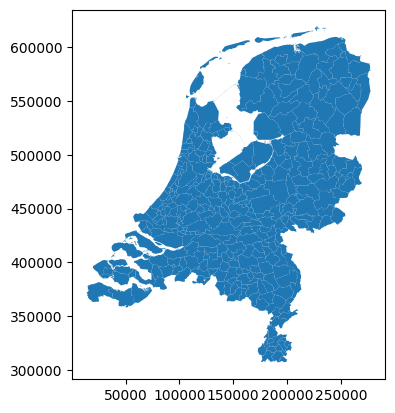

In [33]:
#Load the shapefile for the study area and check if it worked
mulier = gpd.read_file('/work/Data/Predictors/sport_movement_areas_index/mulier_20210901_kbo_gemeente.shp')
mulier.plot()
plt.show()

In [34]:
#Check what the data looks like
mulier.head(2)

,id,gemeenteco,gemeentena,groenblauw,accommodat,speelplekk,voorzienin,kernindica,totaal,geometry
0,1,GM0518,'s-Gravenhage,51.0,77.42,21.0,81.0,58.0,58.0,"MULTIPOLYGON (((73038.250 452859.401, 73029.58..."
1,2,GM0796,'s-Hertogenbosch,73.0,58.09,-9997.0,48.0,0.0,60.0,"POLYGON ((158563.020 419595.208, 158586.535 41..."


In [35]:
data = pd.read_csv('/work/Data/Predictors/ssml_data.csv')
data.head(3)

,Code,ExperiencedHealthGoodVeryGood,OneOrMorePhysicalLimitations,LimitationInMovement,Underweight,NormalWeight,Overweight,SatisfiesPhysicalActivityGuidelines,WeeklySportsParticipant,Smokers,...,RestWithin5Km,DistanceToAccessMainRoad,DistanceToTrainStationsTotal,DistanceToImportantTransferStation,Gemeentenaam,ProvinciecodePV,Provincienaam,Population,DensityPerKM,CarsPer1000
0,GM1680,83.1,13.8,8.2,0.7,50.1,49.2,47.3,48.3,14.3,...,10.6,1.6,12.5,28.6,Aa en Hunze,PV22,Drenthe,25445.0,92.0,576.0
1,GM0358,82.7,10.2,5.8,1.2,50.3,48.5,48.1,58.8,13.0,...,36.0,1.1,8.1,8.9,Aalsmeer,PV27,Noord-Holland,31859.0,1584.0,532.0
2,GM0197,79.1,15.1,8.3,1.4,49.2,49.4,56.2,51.5,14.7,...,11.6,1.0,4.4,41.0,Aalten,PV25,Gelderland,27121.0,281.0,527.0


In [36]:
mulier.columns

Index(['id', 'gemeenteco', 'gemeentena', 'groenblauw', 'accommodat',
       'speelplekk', 'voorzienin', 'kernindica', 'totaal', 'geometry'],
      dtype='object')

In [37]:
#Merging the project data with the shapefile
merged = pd.merge(data, mulier, left_on='Code', right_on='gemeenteco')
         
#Drop the unnecessary columns
municipalities = merged.drop(columns=['id', 'gemeenteco', 'gemeentena', 'groenblauw', 'accommodat',
       'speelplekk', 'voorzienin', 'kernindica'])

In [38]:
#Check if it worked
municipalities.head(2)

,Code,ExperiencedHealthGoodVeryGood,OneOrMorePhysicalLimitations,LimitationInMovement,Underweight,NormalWeight,Overweight,SatisfiesPhysicalActivityGuidelines,WeeklySportsParticipant,Smokers,...,DistanceToTrainStationsTotal,DistanceToImportantTransferStation,Gemeentenaam,ProvinciecodePV,Provincienaam,Population,DensityPerKM,CarsPer1000,totaal,geometry
0,GM1680,83.1,13.8,8.2,0.7,50.1,49.2,47.3,48.3,14.3,...,12.5,28.6,Aa en Hunze,PV22,Drenthe,25445.0,92.0,576.0,41.0,"POLYGON ((248579.512 567922.543, 248630.962 56..."
1,GM0358,82.7,10.2,5.8,1.2,50.3,48.5,48.1,58.8,13.0,...,8.1,8.9,Aalsmeer,PV27,Noord-Holland,31859.0,1584.0,532.0,50.0,"POLYGON ((116307.661 478635.954, 116369.516 47..."


In [39]:
#Rename 'totaal' to 'greenindic'
municipalities2 = municipalities.rename(columns={'totaal': 'Greenindic'})
municipalities2.head()

,Code,ExperiencedHealthGoodVeryGood,OneOrMorePhysicalLimitations,LimitationInMovement,Underweight,NormalWeight,Overweight,SatisfiesPhysicalActivityGuidelines,WeeklySportsParticipant,Smokers,...,DistanceToTrainStationsTotal,DistanceToImportantTransferStation,Gemeentenaam,ProvinciecodePV,Provincienaam,Population,DensityPerKM,CarsPer1000,Greenindic,geometry
0,GM1680,83.1,13.8,8.2,0.7,50.1,49.2,47.3,48.3,14.3,...,12.5,28.6,Aa en Hunze,PV22,Drenthe,25445.0,92.0,576.0,41.0,"POLYGON ((248579.512 567922.543, 248630.962 56..."
1,GM0358,82.7,10.2,5.8,1.2,50.3,48.5,48.1,58.8,13.0,...,8.1,8.9,Aalsmeer,PV27,Noord-Holland,31859.0,1584.0,532.0,50.0,"POLYGON ((116307.661 478635.954, 116369.516 47..."
2,GM0197,79.1,15.1,8.3,1.4,49.2,49.4,56.2,51.5,14.7,...,4.4,41.0,Aalten,PV25,Gelderland,27121.0,281.0,527.0,39.0,"POLYGON ((236230.546 443306.852, 236251.256 44..."
3,GM0059,79.1,16.0,11.4,0.8,42.6,56.6,48.7,40.7,19.8,...,7.3,26.8,Achtkarspelen,PV21,Friesland,27843.0,272.0,529.0,46.0,"POLYGON ((208871.810 587327.160, 208892.310 58..."
4,GM0482,77.0,17.1,11.5,2.0,41.7,56.3,42.9,40.0,14.9,...,8.5,11.2,Alblasserdam,PV28,Zuid-Holland,20165.0,2297.0,454.0,68.0,"POLYGON ((102779.950 432792.060, 102785.681 43..."


In [40]:
#Converting the merged data to a GeoDataFrame
merged_gdf = gpd.GeoDataFrame(municipalities2, geometry='geometry')

#Saving the updated shapefile
merged_gdf.to_file('municipalities.shp', driver='ESRI Shapefile')

/tmp/ipykernel_1518/1334592791.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_gdf.to_file('municipalities.shp', driver='ESRI Shapefile')


In [41]:
#Column names got shortened :( so file down below for full names
municip = gpd.read_file('municipalities.shp')
municip.head()

,Code,Experience,OneOrMoreP,Limitation,Underweigh,NormalWeig,Overweight,SatisfiesP,WeeklySpor,Smokers,...,Distance_7,Distance_8,Gemeentena,Provinciec,Provincien,Population,DensityPer,CarsPer100,Greenindic,geometry
0,GM1680,83.1,13.8,8.2,0.7,50.1,49.2,47.3,48.3,14.3,...,12.5,28.6,Aa en Hunze,PV22,Drenthe,25445.0,92.0,576.0,41.0,"POLYGON ((248579.512 567922.543, 248630.962 56..."
1,GM0358,82.7,10.2,5.8,1.2,50.3,48.5,48.1,58.8,13.0,...,8.1,8.9,Aalsmeer,PV27,Noord-Holland,31859.0,1584.0,532.0,50.0,"POLYGON ((116307.661 478635.954, 116369.516 47..."
2,GM0197,79.1,15.1,8.3,1.4,49.2,49.4,56.2,51.5,14.7,...,4.4,41.0,Aalten,PV25,Gelderland,27121.0,281.0,527.0,39.0,"POLYGON ((236230.546 443306.852, 236251.256 44..."
3,GM0059,79.1,16.0,11.4,0.8,42.6,56.6,48.7,40.7,19.8,...,7.3,26.8,Achtkarspelen,PV21,Friesland,27843.0,272.0,529.0,46.0,"POLYGON ((208871.810 587327.160, 208892.310 58..."
4,GM0482,77.0,17.1,11.5,2.0,41.7,56.3,42.9,40.0,14.9,...,8.5,11.2,Alblasserdam,PV28,Zuid-Holland,20165.0,2297.0,454.0,68.0,"POLYGON ((102779.950 432792.060, 102785.681 43..."


In [46]:
municip.shape

(355, 34)

In [42]:
data.columns

Index(['Code', 'ExperiencedHealthGoodVeryGood', 'OneOrMorePhysicalLimitations',
       'LimitationInMovement', 'Underweight', 'NormalWeight', 'Overweight',
       'SatisfiesPhysicalActivityGuidelines', 'WeeklySportsParticipant',
       'Smokers', 'ExcessiveDrinker', 'DistanceToGP', 'GPWithin5Km',
       'DistanceToLargeSupermarket', 'SMWithin5Km',
       'DistanceToDepartmentStore', 'DSWithin20Km', 'DistanceToCafe',
       'CafeWithin5Km_35', 'DistanceToSnackBar', 'SBWithin5Km',
       'DistanceToRestaurant', 'RestWithin5Km', 'DistanceToAccessMainRoad',
       'DistanceToTrainStationsTotal', 'DistanceToImportantTransferStation',
       'Gemeentenaam', 'ProvinciecodePV', 'Provincienaam', 'Population',
       'DensityPerKM', 'CarsPer1000'],
      dtype='object')

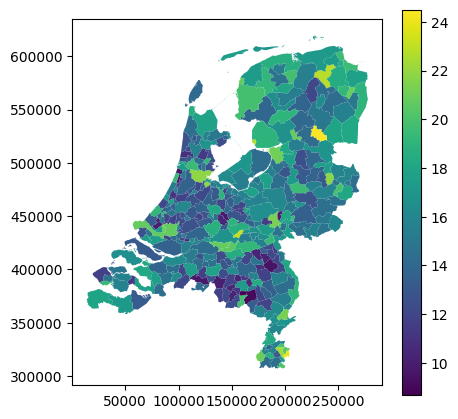

In [43]:
fig, ax = plt.subplots(figsize=(5, 5))
municip.plot(column='Smokers', ax=ax, legend=True, cmap='viridis')
plt.show()

In [44]:
# (Below will only run locally, not in Deepnote :( 

# Create a choropleth map using Plotly
fig = px.choropleth_mapbox(municip, geojson=municip.geometry, locations=municip.index,
                           color='Smokers', color_continuous_scale='viridis',
                           mapbox_style="carto-positron", zoom=3, center={"lat": 52.1326, "lon": 5.2913},
                           opacity=0.5, width=500, height=500)

# Update the layout to show the plot
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Show the plot
fig.show()

NameError: name 'px' is not defined

## Explore data

Plot overweight on map

In [0]:
gdf = gpd.read_file('/work/municipalities.shp')
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='Overweight', ax=ax1, legend=True, cmap='viridis', edgecolor='black', linewidth=0.5)
ax1.set_title('Percentage Overweight per municipality')

In [0]:
mean_overweight_province = data.groupby('Provincienaam')['Overweight'].mean()
mean_overweight_province

In [0]:
gdf

In [0]:
DeepnoteChart(data, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Provincienaam","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"Overweight","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"average","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

In [0]:
#Use describe to look for any disturbances
data.describe()

- Age is 10000 for all municipalities

- High standard deviation for restwithin5km

- We could remove ID and ID_y right?

In [0]:
data

In [0]:
DeepnoteChart(data, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Overweight","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"average","formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"nominal","field":"Provincienaam","scale":{"type":"linear"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

In [0]:
DeepnoteChart(data, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Smokers","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"average","formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"nominal","field":"Provincienaam","scale":{"type":"linear"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

In [0]:
NH = data.loc[data['Provincienaam'] == 'Noord-Holland']

In [0]:
DeepnoteChart(NH, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Gemeentenaam","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"DistanceToLargeSupermarket","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

In [0]:
Utrecht = data.loc[data['Provincienaam'] == 'Utrecht']
#SatisfiesPhysical column many missing values for Utrecht

In [0]:
DeepnoteChart(Utrecht, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"ExcessiveDrinker","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"nominal","field":"Gemeentenaam","scale":{"type":"linear"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

In [0]:
DeepnoteChart(Utrecht, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"RestWithin5Km","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"nominal","field":"Gemeentenaam","scale":{"type":"linear"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

In [0]:
import pandas as pd
data = pd.read_csv("/work/Data/Predictors/ssml_data.csv")

In [0]:
NH = data.loc[data['Provincienaam'] == 'Noord-Holland']
UU = data.loc[data['Provincienaam'] == 'Utrecht']
ZH = data.loc[data['Provincienaam'] == 'Zuid-Holland']

In [0]:
DeepnoteChart(ZH, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"RestWithin5Km","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"nominal","field":"Gemeentenaam","scale":{"type":"linear"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cfc4dc78-fd2a-4b67-8dea-b0c970af57ec' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>